In [1]:
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [2]:
img_shape = (224, 224, 3) # image shape
num_classes = 5 # number of classes

In [3]:
input = Input(shape=img_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

In [4]:
model = Model(input, output)

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [8]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
batch_size = 32
train_generator = train_datagen.flow_from_directory(
        'basedata/F dataset/train',
        target_size=img_shape[:2],
        batch_size=32,
        class_mode='categorical')

Found 1738 images belonging to 5 classes.


In [10]:
val_generator = val_datagen.flow_from_directory(
        'basedata/F dataset/test',
        target_size=img_shape[:2],
        batch_size=batch_size,
        class_mode='categorical')

Found 53 images belonging to 5 classes.


In [11]:
num_epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = val_generator.n // batch_size

In [12]:
history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=num_epochs,
        validation_data=val_generator,
        validation_steps=validation_steps)

Epoch 1/10
54/54 [==============================] - 298s 5s/step - loss: 1.0886 - accuracy: 0.5270 - val_loss: 10.9095 - val_accuracy: 0.1875
Epoch 2/10
54/54 [==============================] - 315s 6s/step - loss: 0.4923 - accuracy: 0.8353 - val_loss: 6.9351 - val_accuracy: 0.1875
Epoch 3/10
54/54 [==============================] - 304s 6s/step - loss: 0.3171 - accuracy: 0.9080 - val_loss: 13.8621 - val_accuracy: 0.2188
Epoch 4/10
54/54 [==============================] - 265s 5s/step - loss: 0.4031 - accuracy: 0.9285 - val_loss: 4.6274 - val_accuracy: 0.1875
Epoch 5/10
54/54 [==============================] - 267s 5s/step - loss: 0.2999 - accuracy: 0.8953 - val_loss: 11.1389 - val_accuracy: 0.2188
Epoch 6/10
54/54 [==============================] - 303s 6s/step - loss: 0.4290 - accuracy: 0.9349 - val_loss: 29.8668 - val_accuracy: 0.1562
Epoch 7/10
54/54 [==============================] - 269s 5s/step - loss: 0.7391 - accuracy: 0.7579 - val_loss: 14.5025 - val_accuracy: 0.1562
Epoch 8/

In [13]:
# save the model
model.save('my_model.h5')

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [15]:
img = image.load_img("basedata/F dataset/train/A/A_original_1.jpg_0a14b5d0-f616-4495-864d-d84090c90802.jpg")

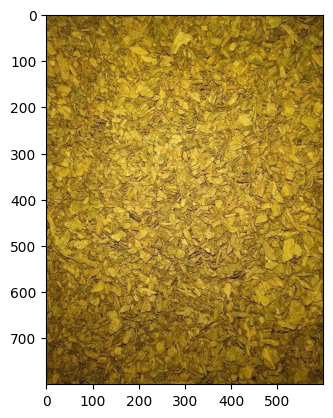

In [16]:
plt.imshow(img)

In [17]:
img_height,img_width=180, 180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "basedata/F dataset/train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1738 files belonging to 5 classes.
Using 1391 files for training.


In [18]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "basedata/F dataset/test",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 53 files belonging to 5 classes.
Using 10 files for validation.


In [19]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'NG']


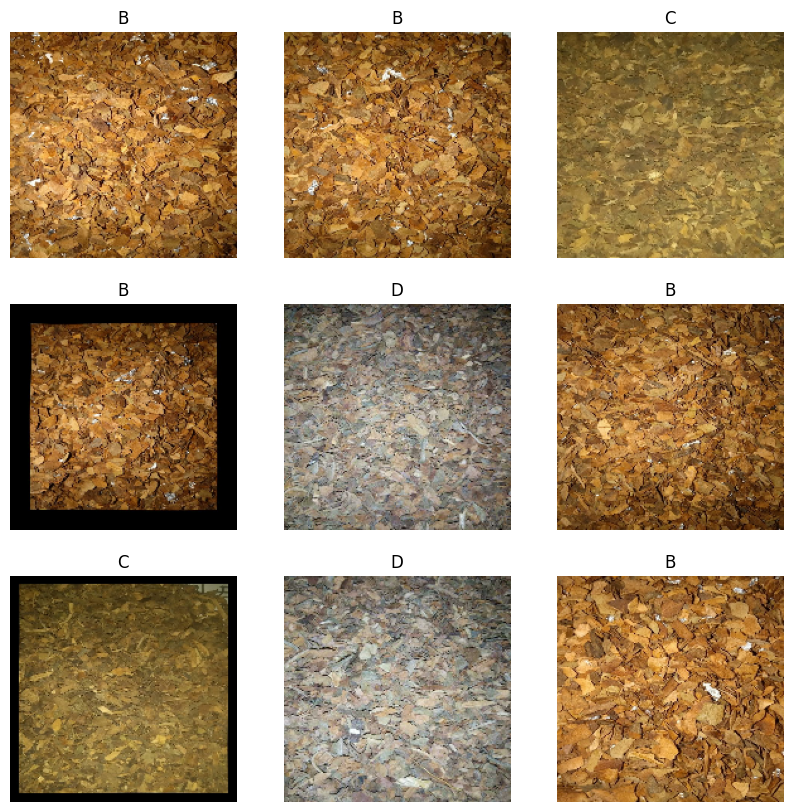

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856 

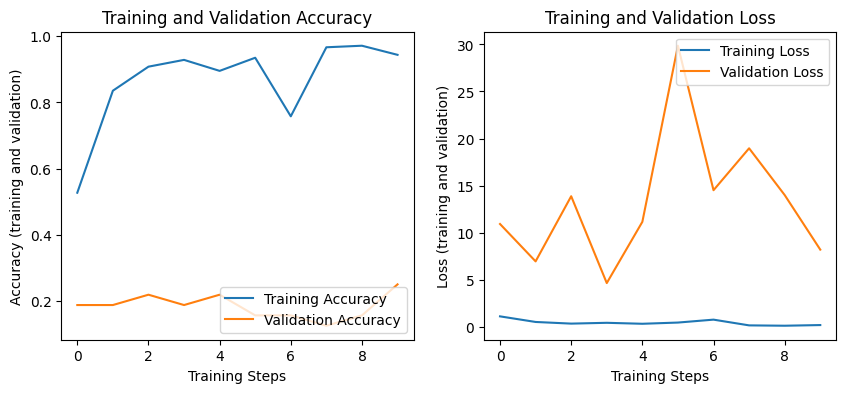

In [22]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()